In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
import numpy as np

In [17]:
df=pd.read_csv('AB_test1.CSV')


In [18]:
df

,Unnamed: 0,id,country,gender,device,group,total_spent,whether_converted
0,NaN,1049999,GBR,M,I,B,0.0,0
1,NaN,1049998,CAN,M,I,B,0.0,0
2,NaN,1049997,BRA,M,A,B,0.0,0
3,NaN,1049996,USA,F,A,A,0.0,0
4,NaN,1049995,BRA,F,A,B,0.0,0
...,...,...,...,...,...,...,...,...
48938,NaN,1000004,DEU,F,A,A,0.0,0
48939,NaN,1000003,BRA,M,I,B,0.0,0
48940,NaN,1000002,FRA,M,A,A,0.0,0
48941,NaN,1000001,BRA,M,A,A,0.0,0


In [20]:
df

,id,country,gender,device,group,total_spent,whether_converted
0,1049999,GBR,M,I,B,0.0,0
1,1049998,CAN,M,I,B,0.0,0
2,1049997,BRA,M,A,B,0.0,0
3,1049996,USA,F,A,A,0.0,0
4,1049995,BRA,F,A,B,0.0,0
...,...,...,...,...,...,...,...
48938,1000004,DEU,F,A,A,0.0,0
48939,1000003,BRA,M,I,B,0.0,0
48940,1000002,FRA,M,A,A,0.0,0
48941,1000001,BRA,M,A,A,0.0,0


In [21]:
#counting(number of users per group) and finding the sum of whether_converted to establish rate of conversion
rate_of_conversion = df.groupby('group')['whether_converted'].agg(
    sum_whether_converted='sum',
    group_count='count'
)
rate_of_conversion

,sum_whether_converted,group_count
group,,
A,955,24343
B,1139,24600


In [22]:
# rate of conversion
rate_of_conversion['conversion_rate'] = (rate_of_conversion.sum_whether_converted/rate_of_conversion.group_count)*100
rate_of_conversion


,sum_whether_converted,group_count,conversion_rate
group,,,
A,955,24343,3.923099
B,1139,24600,4.630081


In [23]:
#KPI 1: average Revenue spent per user
arpu=df['total_spent'].sum()/df['id'].count()
print(arpu)

3.3827356298874625


In [24]:
#KPI 1: average Revenue spent per user
arpu=df['total_spent'].sum()/df['id'].count()
print(arpu)

3.3827356298874625


In [25]:
#KPI 2:segmented conversion rate
#segment : gender
g_rate = df.groupby(['group', 'gender'])['whether_converted'].agg(
    sum_whether_converted='sum',
    group_count='count',
    gender_count='count'
)
g_rate

sum_whether_converted  group_count  gender_count
group gender                                                         
A     F                                518        10069         10069
      M                                264        10054         10054
      O                                 26          808           808
      not_available                    147         3412          3412
B     F                                547        10061         10061
      M                                388        10235         10235
      O                                 26          861           861
      not_available                    178         3443          3443

In [26]:
g_rate['conversion_rate']=(g_rate.sum_whether_converted/g_rate.gender_count)*100
g_rate

sum_whether_converted  group_count  gender_count  \
group gender                                                            
A     F                                518        10069         10069   
      M                                264        10054         10054   
      O                                 26          808           808   
      not_available                    147         3412          3412   
B     F                                547        10061         10061   
      M                                388        10235         10235   
      O                                 26          861           861   
      not_available                    178         3443          3443   

                     conversion_rate  
group gender                          
A     F                     5.144503  
      M                     2.625821  
      O                     3.217822  
      not_available         4.308324  
B     F                     5.436835  
      M                     3.790914  
      O                     3.019744  
      not_available         5.169910

In [27]:
#segment2:device
d_rate= df.groupby(['group', 'device'])['whether_converted'].agg(
    sum_whether_converted='sum',
    group_count='count',
    device_count='count'
)
d_rate

sum_whether_converted  group_count  device_count
group device                                                         
A     A                                417        15054         15054
      I                                535         9142          9142
      not_available                      3          147           147
B     A                                537        15235         15235
      I                                596         9218          9218
      not_available                      6          147           147

In [28]:
d_rate['conversion_rate']=(d_rate.sum_whether_converted/d_rate.device_count)*100
d_rate

sum_whether_converted  group_count  device_count  \
group device                                                            
A     A                                417        15054         15054   
      I                                535         9142          9142   
      not_available                      3          147           147   
B     A                                537        15235         15235   
      I                                596         9218          9218   
      not_available                      6          147           147   

                     conversion_rate  
group device                          
A     A                     2.770028  
      I                     5.852111  
      not_available         2.040816  
B     A                     3.524778  
      I                     6.465611  
      not_available         4.081633

In [29]:
country_rate= df.groupby(['group', 'country'])['whether_converted'].agg(
    sum_whether_converted='sum',
    group_count='count',
    country_count='count'
)
country_rate

sum_whether_converted  group_count  country_count
group country                                                         
A     AUS                               13          608            608
      BRA                              179         4805           4805
      CAN                               36          767            767
      DEU                               61         1906           1906
      ESP                               29          997            997
      FRA                               48         1536           1536
      GBR                               42         1455           1455
      MEX                               83         2815           2815
      TUR                               74         1849           1849
      USA                              374         7309           7309
      not_available                     16          296            296
B     AUS                               17          560            560
      BRA                              188         4629           4629
      CAN                               52          803            803
      DEU                               86         1948           1948
      ESP                               36          996            996
      FRA                               65         1554           1554
      GBR                               55         1494           1494
      MEX                              130         2923           2923
      TUR                               67         1883           1883
      USA                              429         7463           7463
      not_available                     14          347            347

In [30]:
country_rate['conversion_rate']=(country_rate.sum_whether_converted/country_rate.country_count)*100
country_rate

sum_whether_converted  group_count  country_count  \
group country                                                            
A     AUS                               13          608            608   
      BRA                              179         4805           4805   
      CAN                               36          767            767   
      DEU                               61         1906           1906   
      ESP                               29          997            997   
      FRA                               48         1536           1536   
      GBR                               42         1455           1455   
      MEX                               83         2815           2815   
      TUR                               74         1849           1849   
      USA                              374         7309           7309   
      not_available                     16          296            296   
B     AUS                               17          560            560   
      BRA                              188         4629           4629   
      CAN                               52          803            803   
      DEU                               86         1948           1948   
      ESP                               36          996            996   
      FRA                               65         1554           1554   
      GBR                               55         1494           1494   
      MEX                              130         2923           2923   
      TUR                               67         1883           1883   
      USA                              429         7463           7463   
      not_available                     14          347            347   

                     conversion_rate  
group country                         
A     AUS                   2.138158  
      BRA                   3.725286  
      CAN                   4.693611  
      DEU                   3.200420  
      ESP                   2.908726  
      FRA                   3.125000  
      GBR                   2.886598  
      MEX                   2.948490  
      TUR                   4.002163  
      USA                   5.116979  
      not_available         5.405405  
B     AUS                   3.035714  
      BRA                   4.061352  
      CAN                   6.475716  
      DEU                   4.414784  
      ESP                   3.614458  
      FRA                   4.182754  
      GBR                   3.681392  
      MEX                   4.447485  
      TUR                   3.558152  
      USA                   5.748359  
      not_available         4.034582

<Axes: xlabel='group,country'>

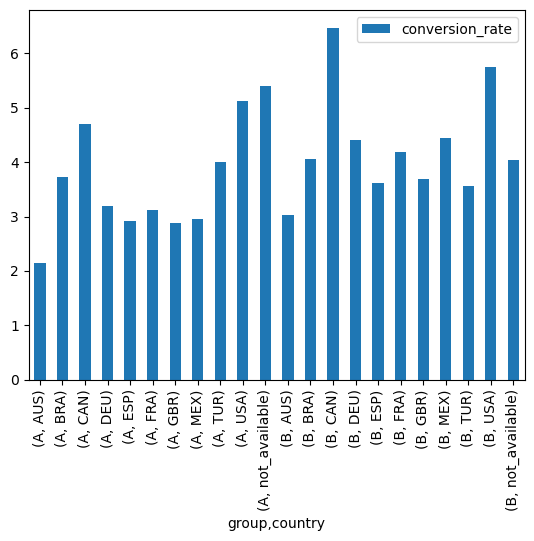

In [31]:
country_rate.plot(y='conversion_rate',kind='bar')

In [46]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import zscore
# A/B hypothesis testing
#Null_hypothesis:p1-p2=p0(pooled propotion)
#Alternative_hypothesis:p1!=p2
A_count=rate_of_conversion.loc['A', 'group_count']
A_conv=rate_of_conversion.loc['A','conversion_rate']/100
B_count=rate_of_conversion.loc['B','group_count']
B_conv=rate_of_conversion.loc['B','conversion_rate']/100

converted_A=int(A_count * A_conv)
converted_B=int(B_count * B_conv)

count_users_converted=np.array([converted_A,converted_B])
total_users = np.array([A_count,B_count])
#calculation of test statistic
z_stat, p_value = proportions_ztest(count_users_converted,total_users , alternative='two-sided')
z_stat = z_stat.round(1)

# Compare p-value to significance level
print(f'Z-statistic: {z_stat:.4f}')
print(f'P-value: {p_value:.4f}')

from scipy.stats import norm
import scipy.stats as stats

# Calculate two-tailed p-value for z-test
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
p_value = p_value.round(4)

# Print the p-value
print("Two-tailed p-value:", p_value)

#5% significance level
alpha=0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in proportions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in proportions.")


Z-statistic: -3.8000
P-value: 0.0001
Two-tailed p-value: 0.0001
Reject the null hypothesis: There is a significant difference in proportions.


In [51]:
#T-test
#null_hypothesis: u1(mean)-u2(mean)=u0(zero)
#alternative hypothesis:u1-u2<>u0
avg_spending=df.groupby('group')['total_spent'].mean()
avg_spending
avg_A=avg_spending.loc['A']
avg_B=avg_spending.loc['B']
stdev=df.groupby('group')['total_spent'].std()
stdev_A=stdev.loc['A']
stdev_B=stdev.loc['B']
avg_A,avg_B
stdev_A,stdev_B

#calculation of test statistic
# Assuming 'group' is the column indicating the groups and 'total_spent' is the column for total spent
total_spent_group_A = df.loc[df['group'] == 'A', 'total_spent']
total_spent_group_B = df.loc[df['group'] == 'B', 'total_spent']
total_A=np.array(total_spent_group_A)
total_B=np.array(total_spent_group_B)
from scipy.stats import ttest_ind
t_statistic, p_value_1 = ttest_ind(total_A, total_B)
t_statistic = t_statistic.round(2)
p_value_1= p_value_1.round(2)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value_1}')
#5% significance level
alpha=0.05

if p_value_1 < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean total spent.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean total spent.")

T-statistic: -0.07
P-value: 0.94
Fail to reject the null hypothesis: There is no significant difference in mean total spent.


In [49]:
#calculating 95% confidence interval for the difference in the conversion rate between the treatment and control.
#count of users in group A:A_count
#count of users in group B:B_count
#propopotion of users in group A:A_conv
#propotion of users in group B:B_conv
confidence_level=0.95
z_value = norm.ppf((1 + confidence_level) / 2)
z_value
# Calculate standard error
std_error = np.sqrt((A_conv * (1 - A_conv) / A_count) + (B_conv * (1 - B_conv) /B_count))
margin_error= std_error*z_value
sample_statistic=B_conv-A_conv
confidence_interval = (sample_statistic - margin_error, sample_statistic + margin_error)
# Print the confidence interval
print(f"Confidence Interval: {confidence_interval}")

Confidence Interval: (0.0034860511629807036, 0.010653593996359593)


In [38]:
# Calculate 95% confidence interval for the difference in the average amount spent per user between the treatment and the control
# mean_A:avg_A
# mean_b:avg_B
# std_A:stdev_A
# std_B:stdev_B
#count of users in group A:A_count
#count of users in group B:B_count
from scipy.stats import t
confidence_level_1=0.95
samp_stat= avg_B-avg_A
degree_freedom=min(A_count - 1, B_count - 1)
critical_value = t.ppf((1 + confidence_level_1) / 2, degree_freedom)
critical_value
std_error_1=np.sqrt((stdev_A**2 / A_count) + (stdev_B**2 / B_count))
margin_error_1= critical_value*std_error_1
confidence_interval_1= confidence_interval = (samp_stat - margin_error_1, samp_stat + margin_error_1)
print(f"Confidence Interval: {confidence_interval_1}")


Confidence Interval: (-0.43866128111980474, 0.4713582370336893)


In [52]:
round(std_error_1,2)


0.23

In [53]:
round(stdev_A,2),round(stdev_B,2)

(25.94, 25.41)

In [54]:
round(avg_A,2),round(avg_B,2)

(3.37, 3.39)